# **1. Perkenalan Dataset**


## 1.1. Sumber Dataset
Dataset ini dapat diakses melalui Kaggle dengan judul "Bank Transaction Dataset for Fraud Detection" yang menyediakan analisis mendetail tentang perilaku transaksi dan deteksi anomali dalam kegiatan keuangan. Dataset ini dapat diunduh di [sini](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection).

## 1.2. Penjelasan Dataset
Dataset ini memberikan gambaran mendetail tentang perilaku transaksi dan pola aktivitas keuangan, yang sangat ideal untuk menganalisis deteksi penipuan dan identifikasi anomali. Dataset ini terdiri dari 2.512 sampel data transaksi, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri dalam dataset ini memberikan wawasan yang komprehensif mengenai perilaku transaksi, memungkinkan analisis untuk aplikasi keamanan finansial dan deteksi penipuan.

## 1.3. Penjelasan Fitur

Berikut adalah penjelasan mengenai fitur-fitur dalam dataset ini:

- **TransactionID**: Identifikasi alfanumerik unik untuk setiap transaksi.
- **AccountID**: Identifikasi unik untuk setiap akun, dengan beberapa transaksi untuk setiap akun.
- **TransactionAmount**: Nilai moneter dari setiap transaksi, yang dapat berupa pengeluaran kecil sehari-hari hingga pembelian besar.
- **TransactionDate**: Waktu dan tanggal transaksi dilakukan.
- **TransactionType**: Jenis transaksi, dapat berupa 'Credit' (kredit) atau 'Debit' (debit).
- **Location**: Lokasi geografis dari transaksi, yang diwakili oleh nama kota di AS.
- **DeviceID**: Identifikasi alfanumerik untuk perangkat yang digunakan untuk melakukan transaksi.
- **IP Address**: Alamat IPv4 yang terkait dengan transaksi, yang kadang-kadang berubah untuk beberapa akun.
- **MerchantID**: Identifikasi unik untuk pedagang, menunjukkan pedagang yang sering digunakan dan pedagang yang jarang digunakan oleh akun tersebut.
- **AccountBalance**: Saldo akun setelah transaksi, yang berhubungan logis dengan jenis dan jumlah transaksi.
- **PreviousTransactionDate**: Waktu dan tanggal transaksi terakhir untuk akun tersebut, digunakan untuk menghitung frekuensi transaksi.
- **Channel**: Saluran tempat transaksi dilakukan (misalnya, Online, ATM, Cabang).
- **CustomerAge**: Umur pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
- **CustomerOccupation**: Pekerjaan pemegang akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), mencerminkan pola pendapatan.
- **TransactionDuration**: Durasi transaksi dalam detik, yang bervariasi tergantung pada jenis transaksi.
- **LoginAttempts**: Jumlah percobaan login sebelum transaksi, dengan nilai yang lebih tinggi menunjukkan potensi anomali.

Dataset ini dirancang untuk analisis pola data, deteksi penipuan, dan membangun model prediktif untuk aplikasi keamanan finansial.

# **2. Import Library**

Library yang akan digunakan untuk analisis ini adalah sebagai berikut.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA

import prince # Untuk reduksi dimensi pada data campuran numerik dan kategorikal
import scipy.stats as stats
import random

from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Dataset yang digunakan akan diimpor melalui URL dari GitHub.

In [3]:
data = pd.read_csv('https://github.com/kurniawanchandraw/Supervised_and_Unsupervised_Project/raw/refs/heads/main/bank_transactions_data_2.csv')
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

## **4.1. Memahami Struktur Data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Dataset terdiri dari 15 kolom dengan campuran antara variabel numerik dan kategorikal. Dataset terdiri dari 2.512 observasi. Namun, perhatikan bahwa variabel yang bertipe `datetime` belum teridentifikasi dengan benar, seperti variabel `TransactionDate` dan `PreviousTransactionDate`.

## **4.2. Analisis Data yang Hilang**

In [6]:
data.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

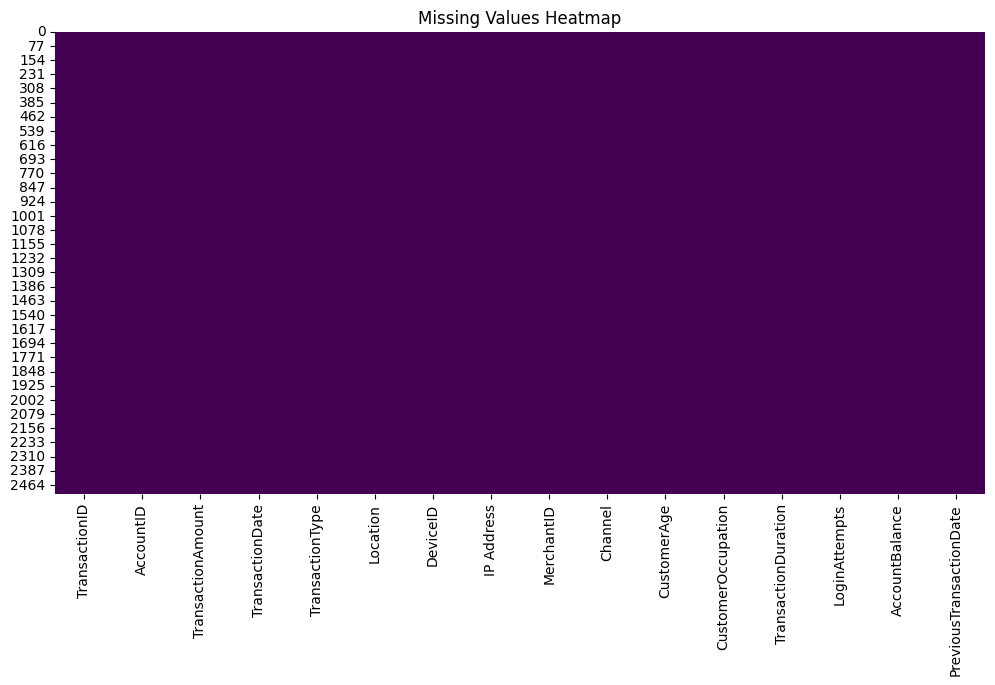

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Tidak terdapat *missing values* atau data yang hilang pada dataset. Selanjutnya, akan dicek duplikasi data terlebih dahulu.

In [8]:
data.duplicated().sum()

0

Terlihat pula tidak terdapat duplikasi pada data.

## **4.3. Analisis Distribusi dan Korelasi**

Korelasi variabel numerik akan dilakukan dengan melihat *matrix scatter plot* dan *density* pada data. 

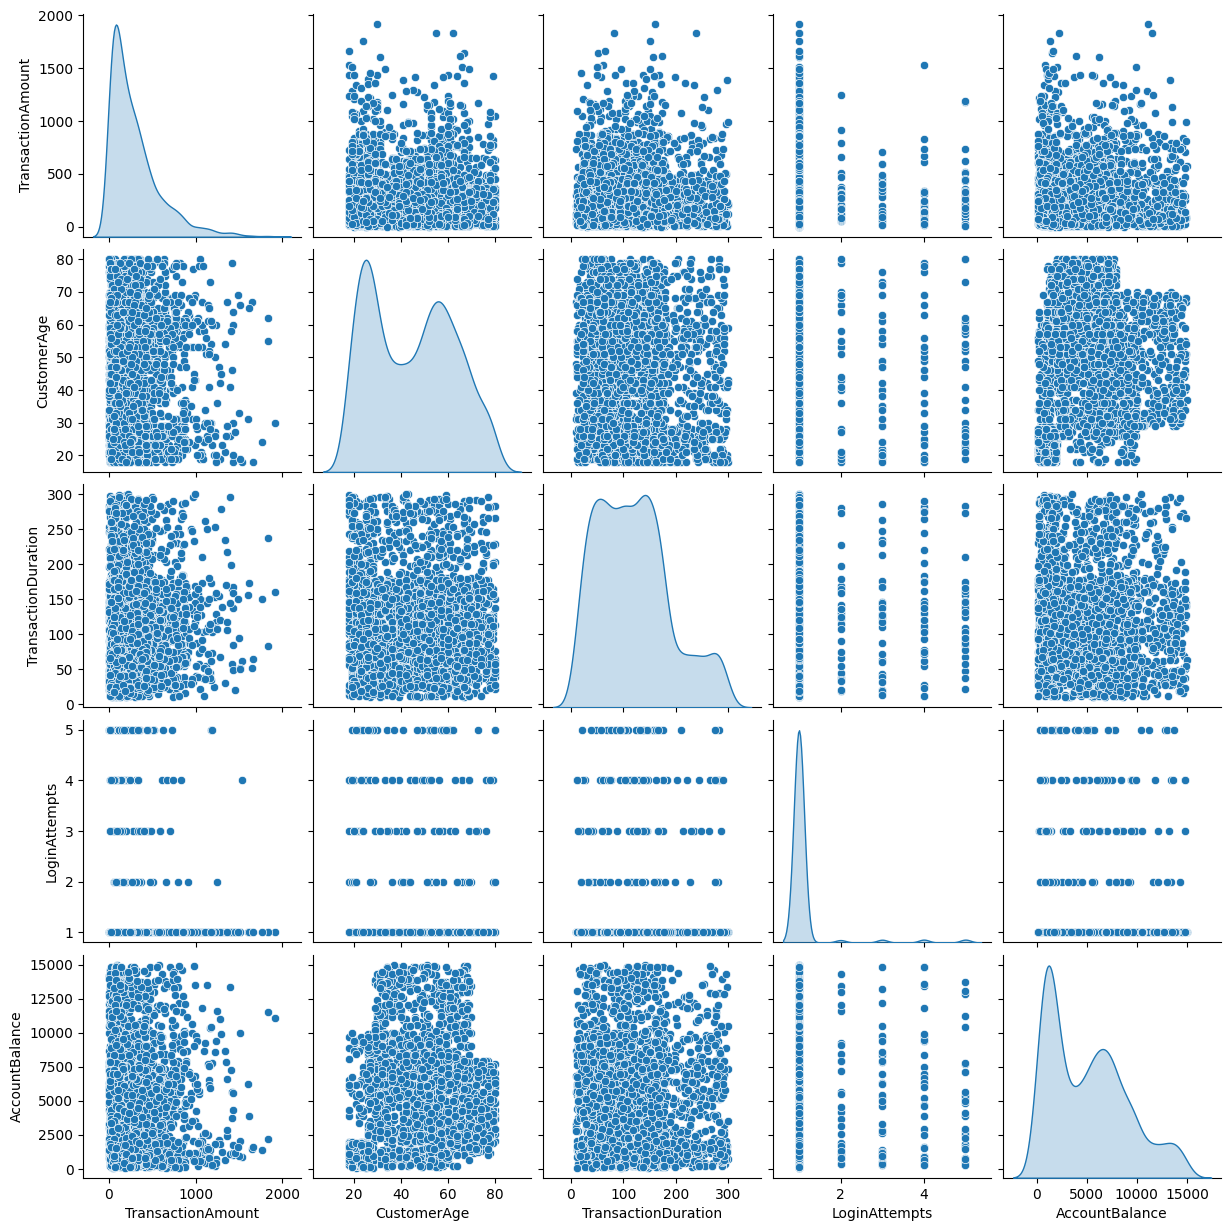

In [9]:
data_num = data.select_dtypes(include='number')
sns.pairplot(data_num, diag_kind='kde')
plt.show()

Tidak terlihat adanya pola hubungan yang jelas antarvariabel numerik. Di sisi lain, sebagian besar distribusi tiap data numerik menjurai ke kanan. Hal ini menandakan adanya nilai ekstrem positif pada data.

Visualisasi pada data kategorik untuk melihat sebaran data dilakukan dengan menggunakan *bar chart*.

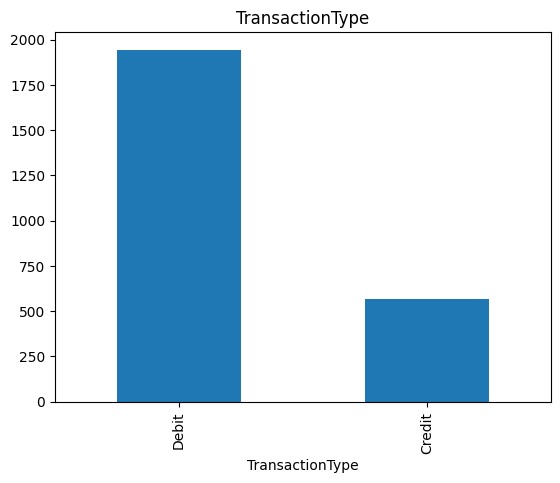

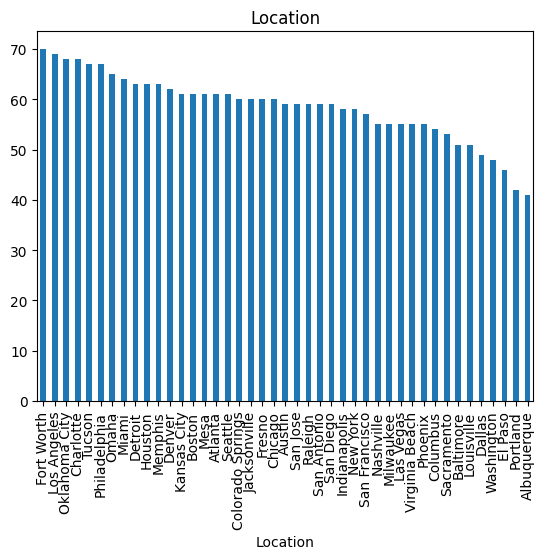

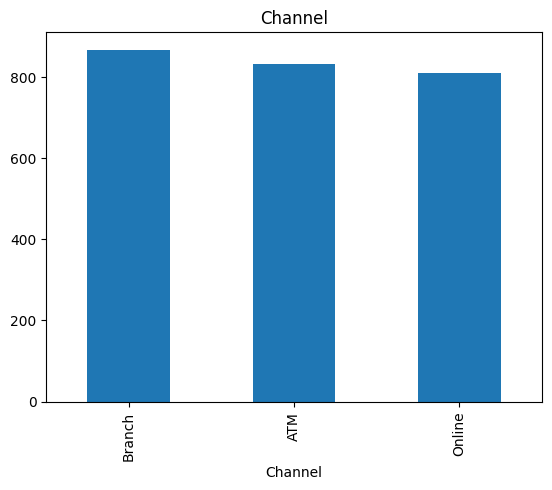

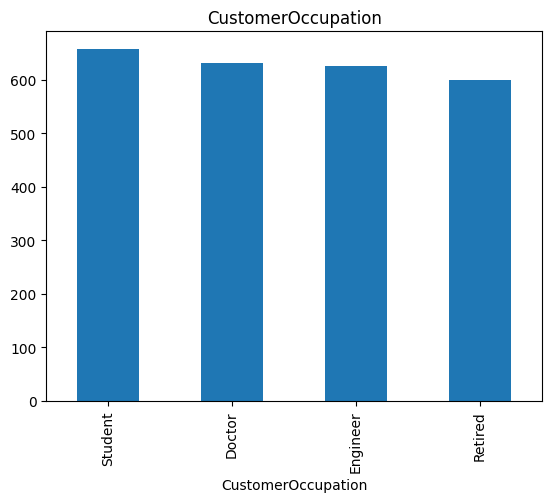

In [10]:
# Beberapa kolom tidak digunakan untuk analisis
exclude_cols = ['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'PreviousTransactionDate', 'MerchantID', 'IP Address']

categories = data.select_dtypes(include='object').columns
for col in categories:
    if col not in exclude_cols:
        data[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

Distribusi variabel numerik secara eksporatif tidak terlihat mengikuti distribusi normal. Oleh karena itu, analisis korelasi akan menggunakan koefisien korelasi Spearman alih-alih korelasi Pearson.

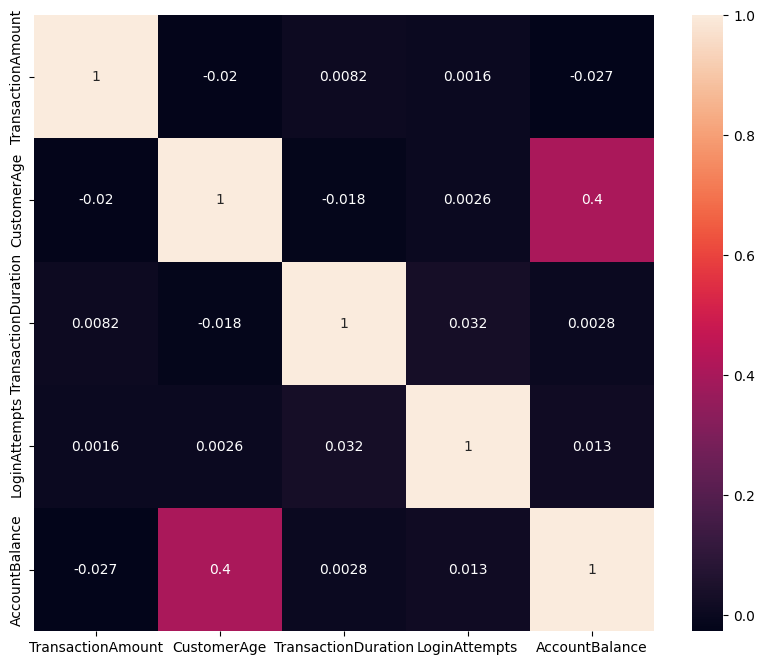

In [11]:
# Heatmap correlation untuk data numerik dengan korelasi Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(data_num.corr(method='spearman'), annot=True)
plt.show()

Di sisi lain, analisis korelasi untuk variabel kategorik akan dilakukan dengan metode Cramér's V. Metode Cramér's V ($\phi_c$) merupakan ukuran asosiasi antara dua variabel nominal. Koefisien Cramér's V dihitung dengan rumus berikut.
$$
V = \sqrt{\dfrac{\chi^2/n}{\min{(k-1,r-1)}}} \tag{1},
$$
dengan $\chi^2$ merupakan statistik dari uji dependensi kategorik dalam uji $\chi^2$.

In [12]:
def cramers_v(x, y):
    '''Fungsi untuk menghitung Cramér's V statistic untuk mengukur asosiasi antara dua variabel kategorikal'''
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

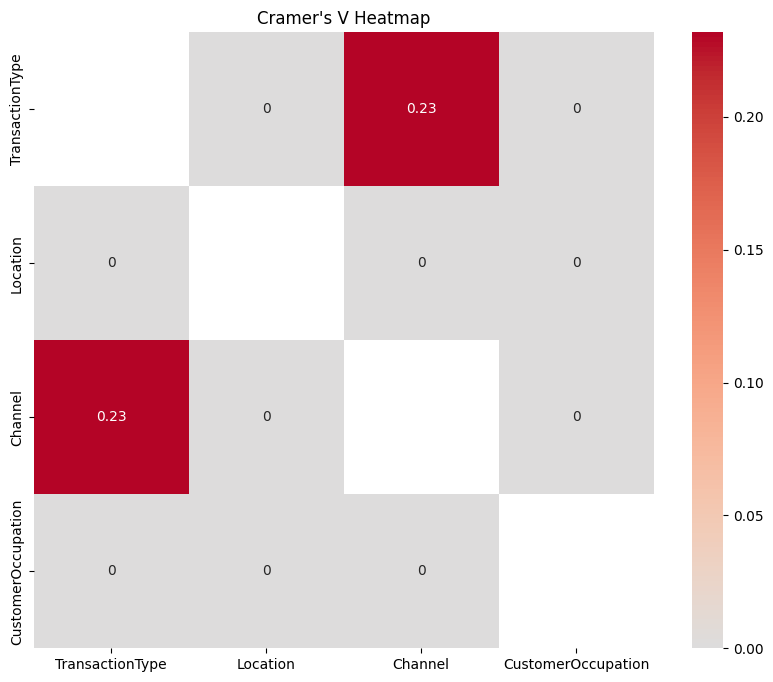

In [13]:
categories = data.select_dtypes(include='object').columns
categories = [col for col in categories if col not in exclude_cols]

cramers_v_matrix = pd.DataFrame(index=categories, columns=categories)
for i, j in combinations(categories, 2):
    cramers_v_matrix.loc[i, j] = cramers_v(data[i], data[j])
    cramers_v_matrix.loc[j, i] = cramers_v(data[j], data[i])

cramers_v_matrix = cramers_v_matrix.astype(float)

# Visualisasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Cramer's V Heatmap")
plt.show()

Terlihat bahwa tidak terdapat korelasi yang tinggi pada variabel kategorik. Sebagian besar menunjukkan tidak ada korelasi, sedangkan hanya variabel Channel dengan Tipe Transaksi menunjukkan korelasi lemah.

## **4.4. Visualisasi Data Lainnya**

EDA yang tidak kalah penting adalah visualisasi banyaknya nilai unik pada setiap variabel kategorik. Hal ini dikarenakan jumlah nilai unik dapat memberikan wawasan penting terkait struktur data dan variabel tersebut. Variabel kategorik dengan sedikit nilai unik cenderung menunjukkan adanya kategori yang dominan atau terpusat, yang bisa mengarah pada kesulitan dalam membedakan pola atau hubungan antar variabel. Sebaliknya, variabel kategorik dengan banyak nilai unik bisa menunjukkan keragaman yang lebih besar dalam data, yang bisa membuat model lebih kompleks, namun juga memberi lebih banyak informasi bagi model dalam menangkap variasi data.

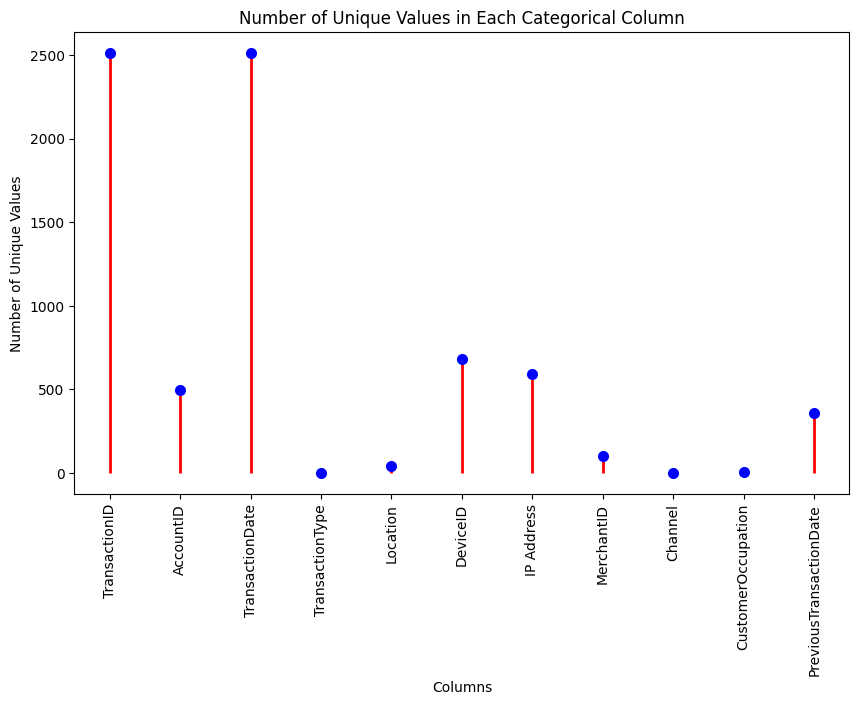

In [14]:
categories = data.select_dtypes(include='object').columns
data_cat = data[categories]

unique_counts = data_cat.nunique()

plt.figure(figsize=(10, 6))
sns.stripplot(x=unique_counts.index, y=unique_counts.values, size=8, jitter=True, color='b')

for i, val in enumerate(unique_counts.values):
    plt.vlines(i, 0, val, colors='r', linestyle='-', linewidth=2)

plt.title('Number of Unique Values in Each Categorical Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.show()


Berdasarkan visualisasi, dapat terlihat bahwa kolom yang secara unik berbeda untuk setiap data adalah Transaction ID dan Transaction Date. Hal ini berarti terdapat kemungkinan Device, Merchant, dan IP Address pada beberapa data adalah sama. Secara praktis, kedua kolom tersebut dapat digunakan sebagai fitur dalam analisis klaster.

# **5. Data Preprocessing**

## **5.1. Konversi Tipe Data**

Variabel `TransactionDate` dan `PreviousTransactionDate` akan diubah menjadi `datetime`.

In [15]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

## **5.2. Feature Engineering**

*Feature engineering* yang dilakukan bertujuan untuk menambah wawasan pada data transaksi dengan menambahkan fitur-fitur yang dapat membantu model memahami pola yang lebih mendalam. Fitur-fitur yang dibuat antara lain adalah jam transaksi (TransactionHour), selisih waktu antara transaksi saat ini dan sebelumnya (TimeSinceLastTransaction), serta rasio jumlah transaksi terhadap saldo akun (TransactionAmountRelativeToBalance). Selain itu, data diurutkan berdasarkan akun dan waktu untuk melacak perubahan perangkat yang digunakan (IsNewDevice), serta menandai adanya upaya login yang gagal (FailedLoginFlag).

In [16]:
# Fitur 1: TransactionHour
data['TransactionHour'] = data['TransactionDate'].dt.hour

# Fitur 2: TimeSinceLastTransaction dalam detik
data['TimeSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds()

# Fitur 3: TransactionAmountRelativeToBalance
data['TransactionAmountRelativeToBalance'] = data['TransactionAmount'] / (data['AccountBalance'] + 1e-5)  # Hindari div by zero

# Fitur 4: IsNewDevice (jika DeviceID berbeda dari transaksi sebelumnya)
data.sort_values(by=['AccountID', 'TransactionDate'], inplace=True)
data['IsNewDevice'] = data.groupby('AccountID')['DeviceID'].transform(lambda x: x != x.shift(1)).astype(object)

# Fitur 5: FailedLoginFlag (jika login attempts > 1)
data['FailedLoginFlag'] = (data['LoginAttempts'] > 1).astype(object)

Eksplorasi data hasil *feature engineering*:

<Figure size 1200x1000 with 0 Axes>

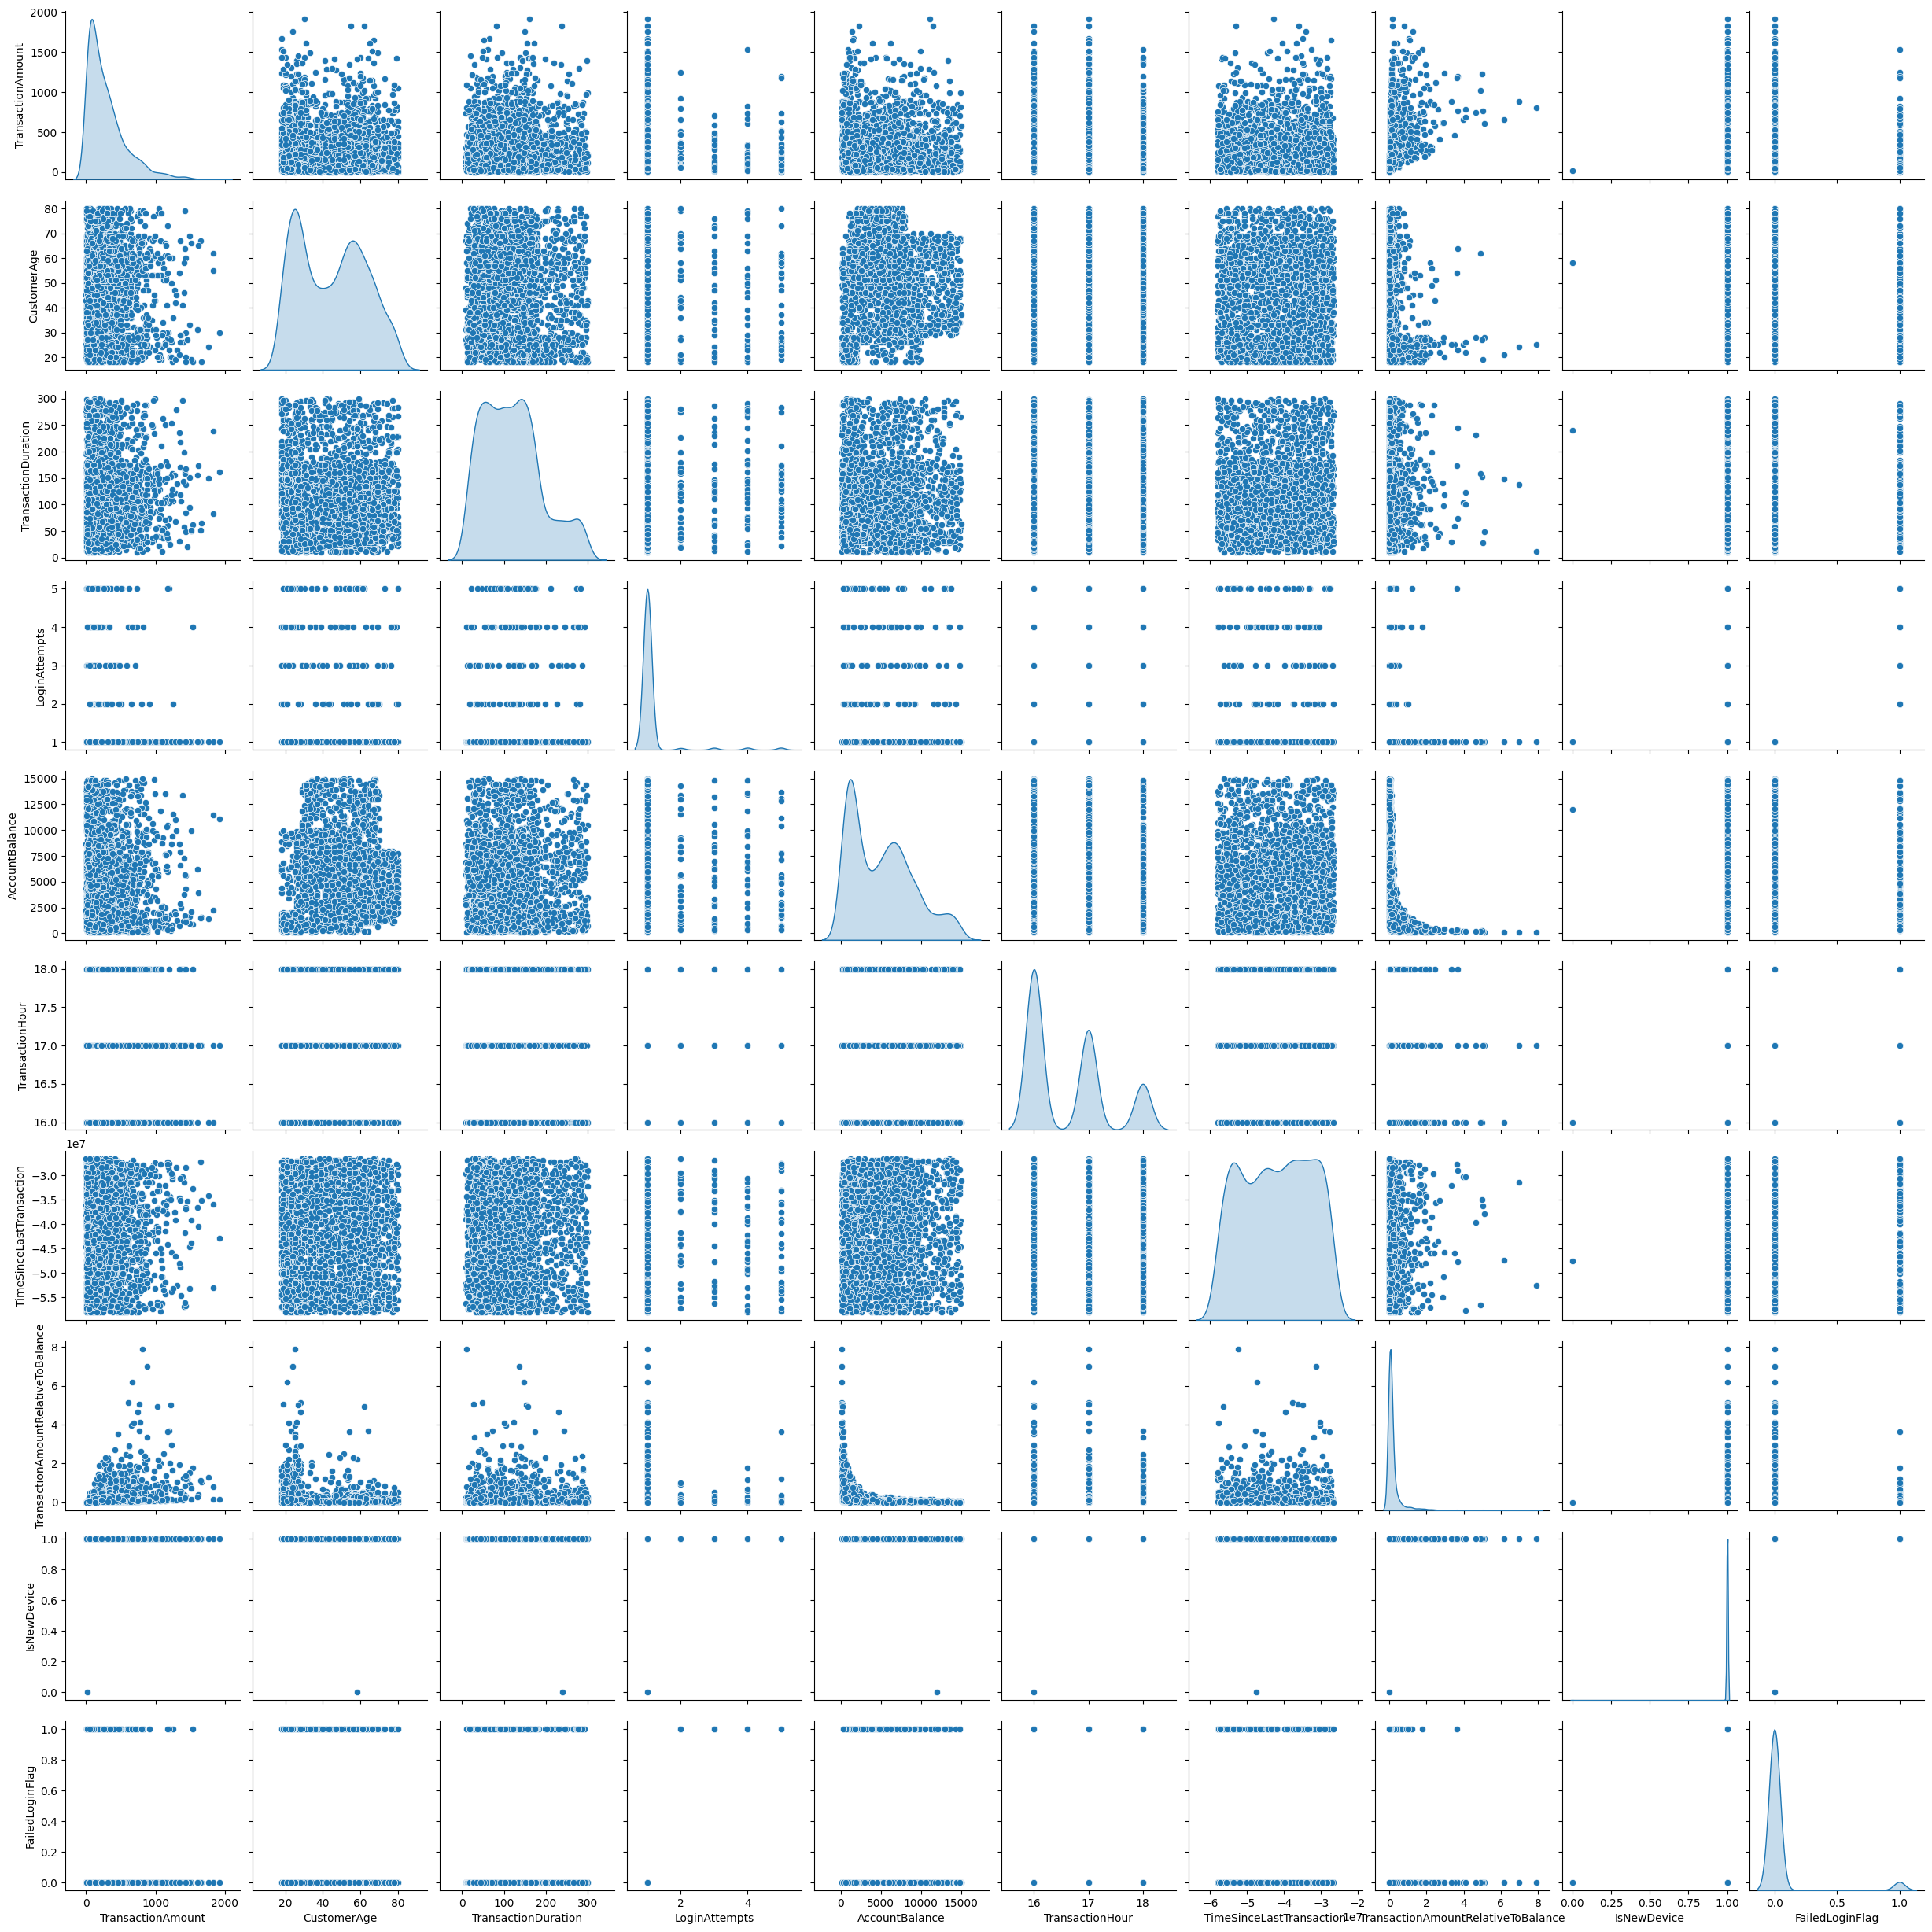

In [17]:
plt.figure(figsize=(12, 10))
sns.pairplot(data, diag_kind='kde')
plt.show()

Belum didapatkan informasi yang relevan, kecuali `FailedLoginFlag` dengan `LoginAttempts` karena keduanya memang berhubungan.

In [18]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionHour,TimeSinceLastTransaction,TransactionAmountRelativeToBalance,IsNewDevice,FailedLoginFlag
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,...,Student,37,1,1649.92,2024-11-04 08:11:55,17,-35910695.0,0.028965,True,False
2016,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,D000492,45.241.13.208,M003,Online,...,Engineer,178,1,4180.40,2024-11-04 08:10:42,16,-30726848.0,0.050945,True,False
2120,TX002121,AC00002,476.99,2023-01-10 16:00:32,Debit,San Diego,D000594,113.137.153.101,M022,Online,...,Student,187,1,1154.48,2024-11-04 08:10:10,16,-57341378.0,0.413164,True,False
20,TX000021,AC00002,59.32,2023-02-28 16:36:58,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,...,Retired,38,1,5750.89,2024-11-04 08:09:24,16,-53105546.0,0.010315,True,False
1476,TX001477,AC00002,12.62,2023-05-05 16:35:44,Debit,El Paso,D000475,93.160.83.196,M068,Branch,...,Doctor,61,1,6420.47,2024-11-04 08:09:03,16,-47403199.0,0.001966,True,False


## **5.3. Feature Scaling**

*Feature scaling* akan dilakukan dengan menggunakan metode standardisasi, yaitu
$$
x_{\text{new}} = \dfrac{x - \bar{x}}{s}\tag{2}.
$$

In [19]:
scaler = StandardScaler()
data_num = data.select_dtypes(include='number')
data_num_scaled = scaler.fit_transform(data_num)

data_num_scaled = pd.DataFrame(data_num_scaled, columns=data_num.columns)
data_num_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TimeSinceLastTransaction,TransactionAmountRelativeToBalance
0,-0.855820,-1.105984,-1.181466,-0.206794,-0.888266,0.511423,0.675556,-0.334233
1,-0.289919,0.805347,0.834265,-0.206794,-0.239452,-0.856729,1.239669,-0.291284
2,0.614606,-1.218415,0.962929,-0.206794,-1.015296,-0.856729,-1.656560,0.416503
3,-0.816319,1.479934,-1.167170,-0.206794,0.163220,-0.856729,-1.195611,-0.370676
4,-0.976312,-0.656259,-0.838362,-0.206794,0.334900,-0.856729,-0.575074,-0.386991


## **5.4. Penanganan Outlier**

Pencilan atau *outlier* akan dideteksi dengan menggunakan jarak Mahalanobis. Jarak ini dihitung dengan rumus berikut.
$$
D_M(\vec{x}) = \sqrt{(\vec{x} - \vec{\mu})^\top \boldsymbol{\Sigma}^{-1} (\vec{x}-\vec{\mu})}, \tag{3}
$$
dengan $\boldsymbol{\Sigma}$ adalah matriks kovariansi. Secara statisik, $D_M(\vec{x}) \sim \chi^2_{p}$ sehingga apabila jarak Mahalanobis lebih besar dari nilai kritis $\chi^2$ pada tingkat signifikansi tertentu, data dianggap sebagai *outlier*. Namun, data yang akan digunakan hanyalah data numerik karena perhitungan ini hanya berlaku pada data numerik.

In [20]:
mean = data_num_scaled.mean()
cov_matrix = np.cov(data_num_scaled.T)

def mahalanobis_distance(x, mean, cov_matrix):
    '''Fungsi untuk menghitung jarak Mahalanobis'''
    diff = x - mean
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    return np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))

mahalanobis_distances = data_num_scaled.apply(mahalanobis_distance, axis=1, mean=mean, cov_matrix=cov_matrix)
data['MahalanobisDistance'] = mahalanobis_distances
data['MahalanobisDistance'].describe()

count    2512.000000
mean        2.609821
std         1.089093
min         0.770344
25%         2.026618
50%         2.403318
75%         2.876065
max        16.704014
Name: MahalanobisDistance, dtype: float64

In [21]:
# Uji inferensi
df = data_num_scaled.shape[1]
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df)
outliers = data[mahalanobis_distances > critical_value]

print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")

Jumlah outlier yang terdeteksi: 1


Hapus *outlier*:

In [22]:
data_cat = data.select_dtypes(include='object')
data_scaled = pd.concat([data_num_scaled, data_cat], axis=1)

outlier_index = outliers.index

data_scaled = data_scaled.drop(outlier_index)
data_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TimeSinceLastTransaction,TransactionAmountRelativeToBalance,TransactionID,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,IsNewDevice,FailedLoginFlag
0,-0.855820,-1.105984,-1.181466,-0.206794,-0.888266,0.511423,0.675556,-0.334233,TX000001,AC00128,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,True,False
1,-0.289919,0.805347,0.834265,-0.206794,-0.239452,-0.856729,1.239669,-0.291284,TX000002,AC00455,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,True,False
2,0.614606,-1.218415,0.962929,-0.206794,-1.015296,-0.856729,-1.656560,0.416503,TX000003,AC00019,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,True,False
3,-0.816319,1.479934,-1.167170,-0.206794,0.163220,-0.856729,-1.195611,-0.370676,TX000004,AC00070,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,True,False
4,-0.976312,-0.656259,-0.838362,-0.206794,0.334900,-0.856729,-0.575074,-0.386991,TX000005,AC00411,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,True,False


## **5.5. Reduksi Dimensi Data**

Reduksi dimensi pada data akan dilakukan dengan metode FAMD atau *factor analysis of mixed data*. Metode ini digunakan karena data terdiri dari variabel numerik dan kategorikal sehingga **tidak diperlukan *encoding* pada data kategorikal**. FAMD adalah pengembangan dari PCA dan MCA. FAMD menggabungkan komponen utama dari PCA dan MCA ke dalam satu ruang dimensi yang lebih rendah, menghasilkan faktor yang menggabungkan informasi dari kedua jenis data.

In [23]:
# Menghapus kolom yang tidak digunakan
exclude_cols = ['TransactionID']
data_scaled.drop(columns=exclude_cols, inplace=True, errors='ignore')

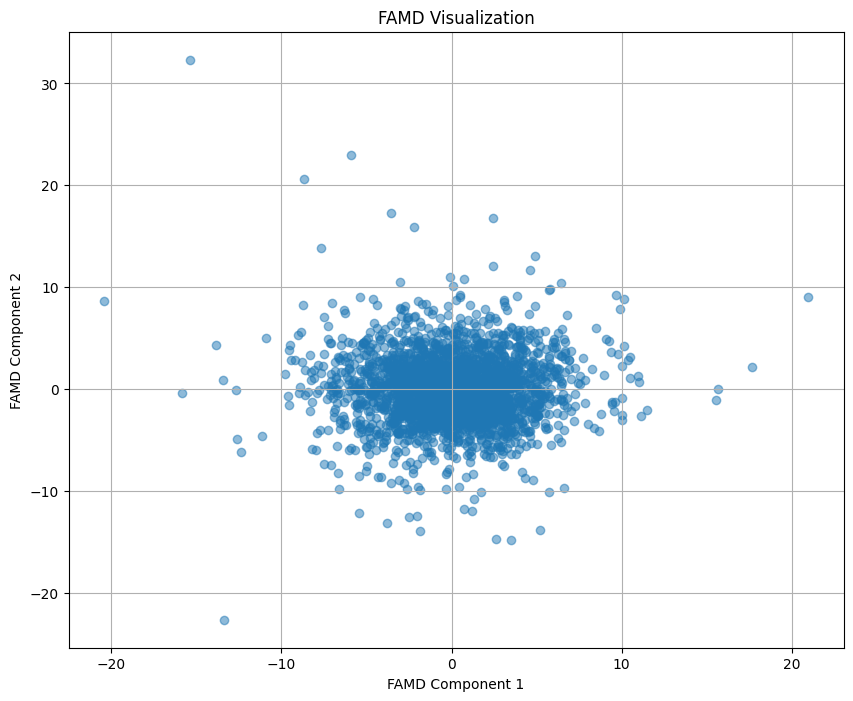

In [24]:
famd = prince.FAMD(n_components=2, random_state=30)
famd = famd.fit(data_scaled)

data_famd = famd.transform(data_scaled)
FAMD_1 = data_famd[0]
FAMD_2 = data_famd[1]

# Visualisasi FAMD
plt.figure(figsize=(10, 8))
plt.scatter(FAMD_1, FAMD_2, alpha=0.5)
plt.title('FAMD Visualization')
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.grid()
plt.show()

Tidak terdapat indikasi bahwa data membentuk klaster berdasarkan *scatter plot* FAMD di atas. Di sisi lain, data-data *outlier* muncul. Analisis lain yang lebih menarik adalah deteksi anomali yang secara konteks lebih sesuai untuk data fraud/non-fraud. Namun, optimasi hasil berupa *silhouette score* dapat dipastikan tidak maksimal.

# **6. Pembangunan Model Clustering**

## **6.1. Pembangunan Model Clustering**

Model awal yang akan digunakan adalah model $k$-means, GMM, dan *agglomerative*.

In [25]:
reduced_data = pd.DataFrame({'FAMD_1': FAMD_1, 'FAMD_2': FAMD_2})

In [26]:
# Membangun model K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(reduced_data)
reduced_data['KMeans_Cluster'] = kmeans.labels_

silhouette_score_value = silhouette_score(reduced_data, reduced_data['KMeans_Cluster'])
davies_bouldin_score_value = davies_bouldin_score(reduced_data, reduced_data['KMeans_Cluster'])
calinski_harabasz_score_value = calinski_harabasz_score(reduced_data, reduced_data['KMeans_Cluster'])

print(f'Silhouette Score: {silhouette_score_value}')
print(f'Davies-Bouldin Score: {davies_bouldin_score_value}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_score_value}')

Silhouette Score: 0.3111585476035277
Davies-Bouldin Score: 1.240655866703827
Calinski-Harabasz Score: 1085.2566492792262


In [27]:
# Membangun model Gaussian Mixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(reduced_data)
reduced_data['GMM_Cluster'] = gmm.predict(reduced_data)
reduced_data['GMM_Cluster'].value_counts()

silhouette_score_value_gmm = silhouette_score(reduced_data, reduced_data['GMM_Cluster'])
davies_bouldin_score_value_gmm = davies_bouldin_score(reduced_data, reduced_data['GMM_Cluster'])
calinski_harabasz_score_value_gmm = calinski_harabasz_score(reduced_data, reduced_data['GMM_Cluster'])

print(f'Silhouette Score GMM: {silhouette_score_value_gmm}')
print(f'Davies-Bouldin Score GMM: {davies_bouldin_score_value_gmm}')
print(f'Calinski-Harabasz Score GMM: {calinski_harabasz_score_value_gmm}')

Silhouette Score GMM: 0.32151454148663283
Davies-Bouldin Score GMM: 1.2203881849428369
Calinski-Harabasz Score GMM: 1121.6029261471397


In [28]:
# Membangun model Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(reduced_data)
reduced_data['Agglomerative_Cluster'] = agg_clustering.labels_
reduced_data['Agglomerative_Cluster'].value_counts()

silhouette_score_value_agg = silhouette_score(reduced_data, reduced_data['Agglomerative_Cluster'])
davies_bouldin_score_value_agg = davies_bouldin_score(reduced_data, reduced_data['Agglomerative_Cluster'])
calinski_harabasz_score_value_agg = calinski_harabasz_score(reduced_data, reduced_data['Agglomerative_Cluster'])

print(f'Silhouette Score Agglomerative: {silhouette_score_value_agg}')
print(f'Davies-Bouldin Score Agglomerative: {davies_bouldin_score_value_agg}')
print(f'Calinski-Harabasz Score Agglomerative: {calinski_harabasz_score_value_agg}')

Silhouette Score Agglomerative: 0.33070643600621175
Davies-Bouldin Score Agglomerative: 1.2025973885976051
Calinski-Harabasz Score Agglomerative: 1154.0493958946429


## **6.2. Evaluasi Model Clustering**

Evaluasi model $k$-Means:

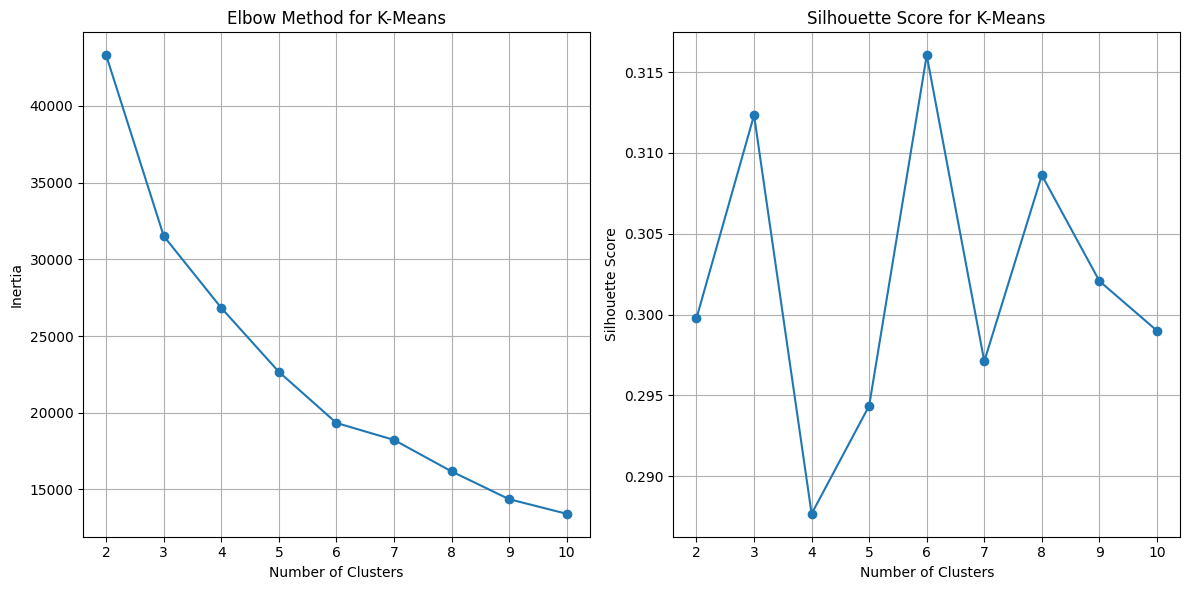

In [29]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data[['FAMD_1', 'FAMD_2']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_data[['FAMD_1', 'FAMD_2']], kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.tight_layout()

plt.show()

Evaluasi model GMM:

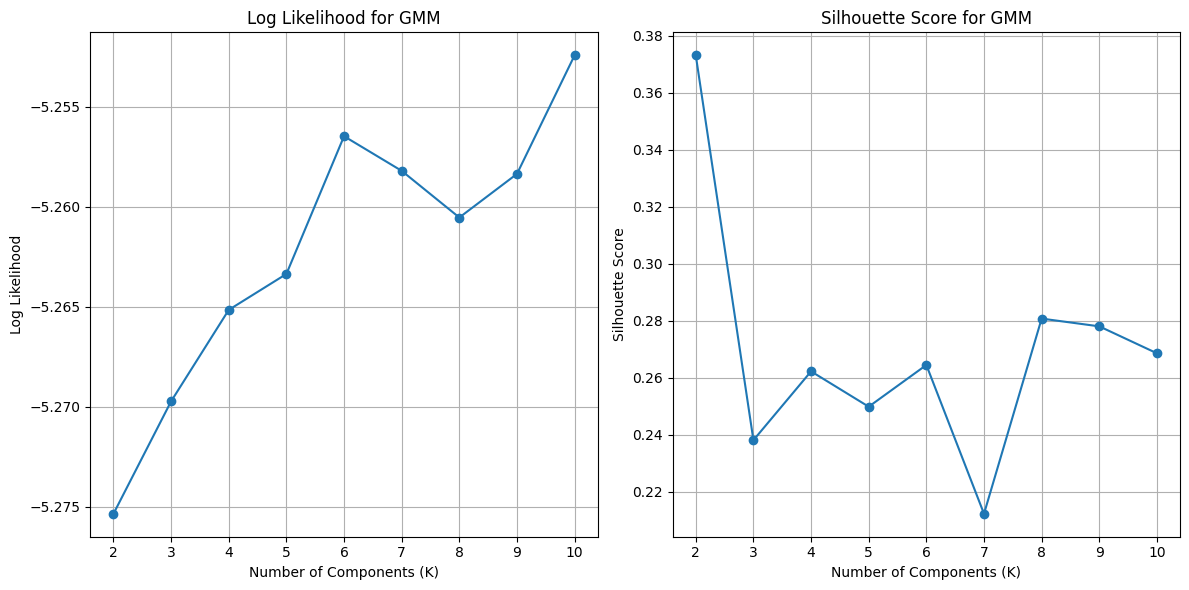

In [30]:
K_range = range(2, 11)
log_likelihood = []
silhouette_scores = []

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(reduced_data[['FAMD_1', 'FAMD_2']])
    
    log_likelihood.append(gmm.lower_bound_)
    
    gmm_labels = gmm.predict(reduced_data[['FAMD_1', 'FAMD_2']])
    silhouette_scores.append(silhouette_score(reduced_data[['FAMD_1', 'FAMD_2']], gmm_labels))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, log_likelihood, marker='o')
plt.title('Log Likelihood for GMM')
plt.xlabel('Number of Components (K)')
plt.ylabel('Log Likelihood')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of Components (K)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

Evaluasi model Agglomerative:

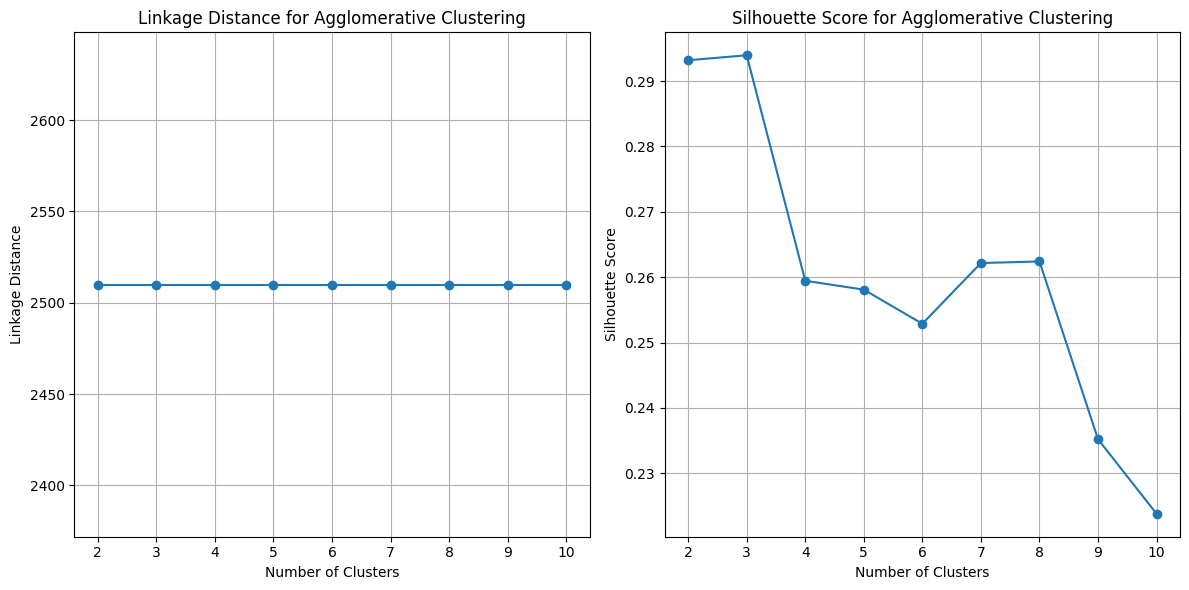

In [31]:
K_range = range(2, 11)

linkage_distances = []
silhouette_scores = []

for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(reduced_data[['FAMD_1', 'FAMD_2']])
    
    linkage_distances.append(agg.children_.shape[0])
    
    agg_labels = agg.labels_
    silhouette_scores.append(silhouette_score(reduced_data[['FAMD_1', 'FAMD_2']], agg_labels))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, linkage_distances, marker='o')
plt.title('Linkage Distance for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Linkage Distance')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()


Terlihat bahwa tidak terdapat model yang memberikan hasil cukup optimal. Oleh karena itu, akan dilakukan *feature selection*.

## **6.3. Feature Selection**

*Feature selection* dilakukan dengan metode iteratif menggunakan *all possible subset*. Optimasi ini membutuhkan waktu komputasi yang cukup lama karena jumlah kombinasi fitur yang harus dieksplorasi sangat besar, terutama jika jumlah fitur yang digunakan cukup banyak. Menggunakan pendekatan *brute-force* untuk mengevaluasi setiap kombinasi subset fitur akan sangat memakan waktu dan sumber daya. Oleh karena itu, eksplorasi seluruh ruang parameter tidak akan dilakukan dalam optimasi ini. Sebagai gantinya, metode yang lebih efisien, yaitu *Random Search*, digunakan untuk mengurangi ruang pencarian dan mempercepat proses seleksi fitur.

Fungsi optimasi:

In [39]:
def evaluate_cluster_for_subset(data_scaled, selected_features):
    '''Fungsi untuk mengevaluasi subset fitur dengan clustering'''
    num_features = [feature for feature in selected_features if feature in numerical_features]
    cat_features = [feature for feature in selected_features if feature in categorical_features]
    
    # Memastikan ada fitur numerik dan kategorikal
    if len(num_features) >= 1 and len(cat_features) >= 1:
        data_subset = data_scaled[selected_features]
        famd = prince.FAMD(n_components=2, random_state=100)
        famd = famd.fit(data_subset)
        data_famd = famd.transform(data_subset)
        data_scaled['FAMD_1'] = data_famd[0]
        data_scaled['FAMD_2'] = data_famd[1]

        kmeans = KMeans(n_clusters=2, random_state=42).fit(data_scaled[['FAMD_1', 'FAMD_2']])
        agg_clustering = AgglomerativeClustering(n_clusters=2).fit(data_scaled[['FAMD_1', 'FAMD_2']])
        gmm = GaussianMixture(n_components=2, random_state=42).fit(data_scaled[['FAMD_1', 'FAMD_2']])

        kmeans_labels = kmeans.labels_
        agg_labels = agg_clustering.labels_
        gmm_labels = gmm.predict(data_scaled[['FAMD_1', 'FAMD_2']])

        # Menghitung Silhouette-Score
        kmeans_silhouette = silhouette_score(data_scaled[['FAMD_1', 'FAMD_2']], kmeans_labels)
        agg_silhouette = silhouette_score(data_scaled[['FAMD_1', 'FAMD_2']], agg_labels)
        gmm_silhouette = silhouette_score(data_scaled[['FAMD_1', 'FAMD_2']], gmm_labels)

        return {
            'Features': selected_features,
            'KMeans Silhouette': kmeans_silhouette,
            'Agglomerative Silhouette': agg_silhouette,
            'GMM Silhouette': gmm_silhouette,
        }
    return None

def random_search_feature_selection(data_scaled, numerical_features, categorical_features, random_state=42, n_iter=50):
    '''Fungsi untuk melakukan pencarian acak untuk seleksi fitur'''
    all_features = numerical_features + categorical_features
    results = []
    
    np.random.seed(random_state)
    random.seed(random_state)
    for _ in range(n_iter):
        subset_size = random.randint(5, 7)
        selected_features = random.sample(all_features, subset_size)
        
        result = evaluate_cluster_for_subset(data_scaled, selected_features)
        if result:
            results.append(result)
    
    results_df = pd.DataFrame(results)
    best_result = results_df.loc[results_df['KMeans Silhouette'].idxmax()]
    
    return best_result, results_df

In [40]:
data_cat = data.select_dtypes(include='object')
data_scaled = pd.concat([data_num_scaled, data_cat], axis=1)
outlier_index = outliers.index
data_scaled = data_scaled.drop(outlier_index)
exclude_cols = ['TransactionID']
data_scaled.drop(columns=exclude_cols, inplace=True, errors='ignore')

numerical_features = data_scaled.select_dtypes(include='number').columns.tolist()
categorical_features = data_scaled.select_dtypes(include='object').columns.tolist()

best_result, results_df = random_search_feature_selection(data_scaled, numerical_features, categorical_features, random_state=10, n_iter=200)
print(best_result)

Features                    [FailedLoginFlag, IsNewDevice, Channel, TimeSi...
KMeans Silhouette                                                    0.673334
Agglomerative Silhouette                                             0.558268
GMM Silhouette                                                       0.673334
Name: 49, dtype: object


In [41]:
best_result['Features']

['FailedLoginFlag',
 'IsNewDevice',
 'Channel',
 'TimeSinceLastTransaction',
 'LoginAttempts',
 'CustomerAge']

In [42]:
results_df.sort_values(by='GMM Silhouette', ascending=False).head(20)

,Features,KMeans Silhouette,Agglomerative Silhouette,GMM Silhouette
53,"[TransactionHour, TransactionType, CustomerAge...",0.396309,0.963142,0.937154
144,"[TransactionAmountRelativeToBalance, Transacti...",0.336879,0.306185,0.883225
67,"[IP Address, Channel, IsNewDevice, Transaction...",0.366080,0.357106,0.866909
152,"[IsNewDevice, CustomerOccupation, IP Address, ...",0.357144,0.316512,0.826223
135,"[AccountBalance, CustomerAge, IsNewDevice, IP ...",0.316154,0.341135,0.810500
129,"[FailedLoginFlag, TransactionType, DeviceID, A...",0.369315,0.370247,0.803639
14,"[TransactionHour, FailedLoginFlag, IsNewDevice...",0.376541,0.385812,0.802086
159,"[TransactionHour, CustomerOccupation, IsNewDev...",0.344736,0.314159,0.796316
183,"[TransactionType, IsNewDevice, IP Address, Cha...",0.342395,0.301254,0.794112
111,"[CustomerAge, TransactionHour, IsNewDevice, IP...",0.361583,0.298151,0.791629


Model terbaik berdasarkan rata-rata silhouette score tertinggi.

In [43]:
results_df['Average Silhouette'] = results_df[['KMeans Silhouette', 'Agglomerative Silhouette', 'GMM Silhouette']].mean(axis=1)
results_df.sort_values(by='Average Silhouette', ascending=False).head(20)

,Features,KMeans Silhouette,Agglomerative Silhouette,GMM Silhouette,Average Silhouette
53,"[TransactionHour, TransactionType, CustomerAge...",0.396309,0.963142,0.937154,0.765535
101,"[IsNewDevice, TransactionAmount, CustomerAge, ...",0.352854,0.960393,0.647162,0.653469
6,"[TransactionAmount, TransactionAmountRelativeT...",0.606509,0.640115,0.710742,0.652455
49,"[FailedLoginFlag, IsNewDevice, Channel, TimeSi...",0.673334,0.558268,0.673334,0.634979
18,"[IsNewDevice, CustomerOccupation, FailedLoginF...",0.619468,0.561676,0.619468,0.600204
185,"[AccountBalance, IsNewDevice, TransactionAmoun...",0.646715,0.394107,0.647803,0.562875
67,"[IP Address, Channel, IsNewDevice, Transaction...",0.366080,0.357106,0.866909,0.530031
59,"[IsNewDevice, CustomerOccupation, LoginAttempt...",0.525577,0.525577,0.525577,0.525577
14,"[TransactionHour, FailedLoginFlag, IsNewDevice...",0.376541,0.385812,0.802086,0.521479
141,"[FailedLoginFlag, CustomerOccupation, Transact...",0.522596,0.509573,0.522596,0.518255


Model Agglomerative memiliki dua kombinasi fitur yang menghasilkan Silhouette Score tertinggi.

In [44]:
best_features = results_df.loc[results_df['Average Silhouette'].idxmax()]['Features']
print(best_features)

['TransactionHour', 'TransactionType', 'CustomerAge', 'TimeSinceLastTransaction', 'IsNewDevice', 'IP Address']


Fitur-fitur terbaik berdasarkan *random search* adalah:
1. Transaction Hour,
2. Transaction Type,
3. Customer Age,
4. Time Since Last Transaction,
5. Is New Device?, dan
6. IP Address.

In [45]:
data_fs = data_scaled[best_features]
data_fs.head()

,TransactionHour,TransactionType,CustomerAge,TimeSinceLastTransaction,IsNewDevice,IP Address
0,0.511423,Debit,-1.105984,0.675556,True,162.198.218.92
1,-0.856729,Debit,0.805347,1.239669,True,13.149.61.4
2,-0.856729,Debit,-1.218415,-1.656560,True,215.97.143.157
3,-0.856729,Debit,1.479934,-1.195611,True,200.13.225.150
4,-0.856729,Credit,-0.656259,-0.575074,True,65.164.3.100


In [46]:
famd = prince.FAMD(n_components=2, random_state=100)
famd = famd.fit(data_fs)
data_famd = famd.transform(data_fs)
data_fs['FAMD_1'] = data_famd[0]
data_fs['FAMD_2'] = data_famd[1]

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_fs[['FAMD_1', 'FAMD_2']])
data_fs['KMeans_Cluster'] = kmeans.labels_

# GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_fs[['FAMD_1', 'FAMD_2']])
data_fs['GMM_Cluster'] = gmm.predict(data_fs[['FAMD_1', 'FAMD_2']])

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(data_fs[['FAMD_1', 'FAMD_2']])
data_fs['Agglomerative_Cluster'] = agg_clustering.labels_

In [47]:
data_fs['KMeans_Cluster'].value_counts(), data_fs['GMM_Cluster'].value_counts(), data_fs['Agglomerative_Cluster'].value_counts()

(KMeans_Cluster
 0    1465
 1    1046
 Name: count, dtype: int64,
 GMM_Cluster
 0    2508
 1       3
 Name: count, dtype: int64,
 Agglomerative_Cluster
 0    2510
 1       1
 Name: count, dtype: int64)

Perhatikan bahwa proporsi klaster masih sangat jauh berbeda. Oleh karena itu, akan dicari kombinasi fitur lainnya.

In [48]:
best_features_revisit = results_df.sort_values(by='Average Silhouette', ascending=False).iloc[2]['Features']
print(best_features_revisit)

['TransactionAmount', 'TransactionAmountRelativeToBalance', 'AccountBalance', 'LoginAttempts', 'CustomerOccupation']


In [49]:
data_fs = data_scaled[best_features_revisit]

famd = prince.FAMD(n_components=2, random_state=42)
famd = famd.fit(data_fs)
data_famd = famd.transform(data_fs)
data_fs['FAMD_1'] = data_famd[0]
data_fs['FAMD_2'] = data_famd[1]

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_fs[['FAMD_1', 'FAMD_2']])
data_fs['KMeans_Cluster'] = kmeans.labels_

# GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_fs[['FAMD_1', 'FAMD_2']])
data_fs['GMM_Cluster'] = gmm.predict(data_fs[['FAMD_1', 'FAMD_2']])

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(data_fs[['FAMD_1', 'FAMD_2']])
data_fs['Agglomerative_Cluster'] = agg_clustering.labels_

In [50]:
data_fs['KMeans_Cluster'].value_counts(), data_fs['GMM_Cluster'].value_counts(), data_fs['Agglomerative_Cluster'].value_counts()

(KMeans_Cluster
 0    2221
 1     290
 Name: count, dtype: int64,
 GMM_Cluster
 1    2387
 0     124
 Name: count, dtype: int64,
 Agglomerative_Cluster
 0    2308
 1     203
 Name: count, dtype: int64)

Perbedaan jumlah anggota klaster sudah tidak terlalu jauh berbeda. Oleh karena itu, kombinasi fitur ini akan digunakan.

**Perbandingan hasil antara sebelum dan sesudah *feature selection*:**

In [51]:
ss = []
db = []
ch = []

ss.append(silhouette_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['KMeans_Cluster']))
db.append(davies_bouldin_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['KMeans_Cluster']))
ch.append(calinski_harabasz_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['KMeans_Cluster']))

ss.append(silhouette_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['GMM_Cluster']))
db.append(davies_bouldin_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['GMM_Cluster']))
ch.append(calinski_harabasz_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['GMM_Cluster']))

ss.append(silhouette_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['Agglomerative_Cluster']))
db.append(davies_bouldin_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['Agglomerative_Cluster']))
ch.append(calinski_harabasz_score(data_fs[['FAMD_1', 'FAMD_2']], data_fs['Agglomerative_Cluster']))

comparison_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'],
    'KMeans Before': [silhouette_score_value, davies_bouldin_score_value, calinski_harabasz_score_value],
    'GMM Before': [silhouette_score_value_gmm, davies_bouldin_score_value_gmm, calinski_harabasz_score_value_gmm],
    'Agglomerative Before': [silhouette_score_value_agg, davies_bouldin_score_value_agg, calinski_harabasz_score_value_agg],
    'KMeans After': [ss[0], db[0], ch[0]],
    'GMM After': [ss[1], db[1], ch[1]],
    'Agglomerative After': [ss[2], db[2], ch[2]]
})

comparison_df.set_index('Metric', inplace=True)
comparison_df

,KMeans Before,GMM Before,Agglomerative Before,KMeans After,GMM After,Agglomerative After
Metric,,,,,,
Silhouette Score,0.311159,0.321515,0.330706,0.606509,0.710742,0.640115
Davies-Bouldin Score,1.240656,1.220388,1.202597,0.710491,0.673496,0.616154
Calinski-Harabasz Score,1085.256649,1121.602926,1154.049396,1295.747513,1163.794759,1254.782588


Model GMM dengan *feature selection* merupakan model terbaik. Selanjutnya, akan dilakukan pemilihan jumlah klaster optimal berdasarkan silhouette score.

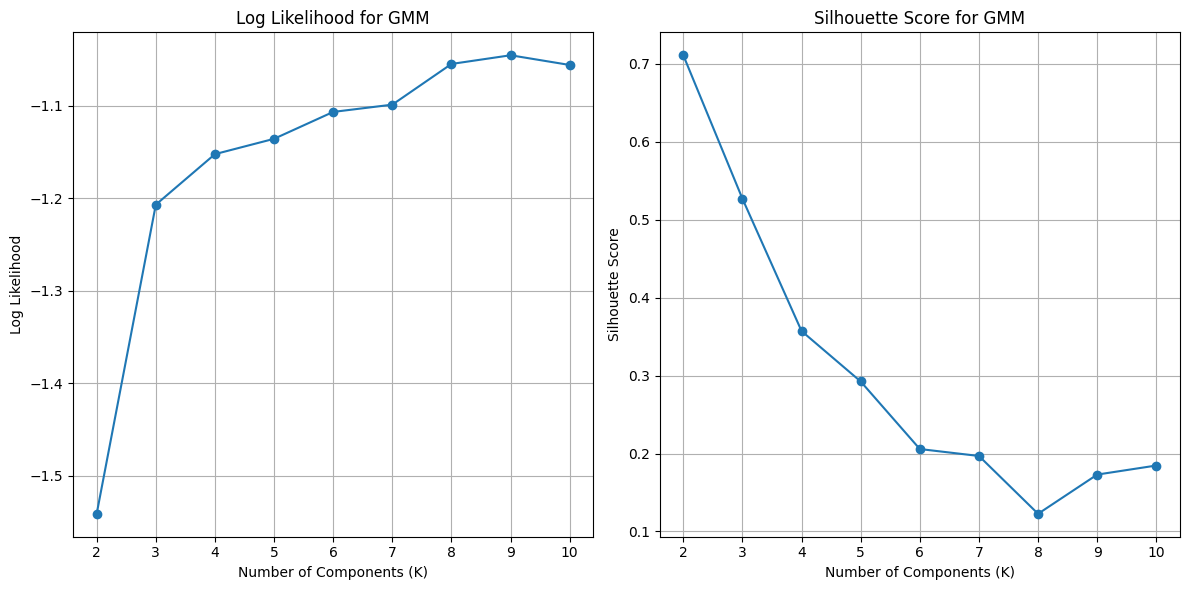

In [52]:
K_range = range(2, 11)
log_likelihood = []
silhouette_scores = []

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_fs[['FAMD_1', 'FAMD_2']])
    
    log_likelihood.append(gmm.lower_bound_)
    
    gmm_labels = gmm.predict(data_fs[['FAMD_1', 'FAMD_2']])
    silhouette_scores.append(silhouette_score(data_fs[['FAMD_1', 'FAMD_2']], gmm_labels))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, log_likelihood, marker='o')
plt.title('Log Likelihood for GMM')
plt.xlabel('Number of Components (K)')
plt.ylabel('Log Likelihood')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of Components (K)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

Jumlah klaster sebanyak 2 tetap digunakan.

## **d. Visualisasi Hasil Clustering**

*Scatter plot* data tereduksi:

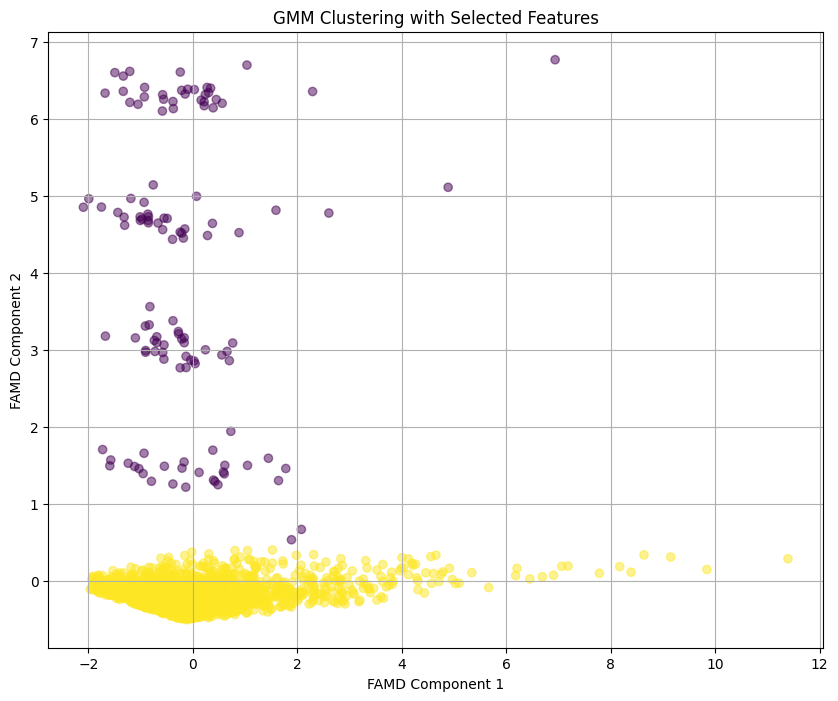

In [53]:
# Visualisasi GMM Clustering
plt.figure(figsize=(10, 8))
plt.scatter(data_fs['FAMD_1'], data_fs['FAMD_2'], c=data_fs['GMM_Cluster'], alpha=0.5)
plt.title('GMM Clustering with Selected Features')
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.grid()
plt.show()

Berdasarkan visualisasi, data sudah cukup terpisahkan dengan baik. Klaster kuning cenderung banyak bergerombol di sekitar nol, tetapi berbeda dengan klaster lainnya.

## **e. Analisis dan Interpretasi Hasil Cluster**

In [54]:
data_interpret = data[best_features_revisit].copy()
data_interpret = data_interpret.drop(outlier_index, axis=0, errors='ignore')
data_interpret['GMM_Cluster'] = data_fs['GMM_Cluster']
data_interpret.head()

,TransactionAmount,TransactionAmountRelativeToBalance,AccountBalance,LoginAttempts,CustomerOccupation,GMM_Cluster
1312,47.79,0.028965,1649.92,1,Student,1
2016,212.97,0.050945,4180.40,1,Engineer,1
2120,476.99,0.413164,1154.48,1,Student,1
20,59.32,0.010315,5750.89,1,Retired,1
1476,12.62,0.001966,6420.47,1,Doctor,1


In [55]:
for col in data_interpret.drop(columns='GMM_Cluster').select_dtypes(include='number').columns:
    print(f"Cluster Analysis for {col}:")
    for cluster in data_interpret['GMM_Cluster'].unique():
        cluster_data = data_interpret[data_interpret['GMM_Cluster'] == cluster][col]
        print(f"Cluster {cluster}: Min: {cluster_data.min()}, Max: {cluster_data.max()}, Mean: {cluster_data.mean()}, Median: {cluster_data.median()}")
    print("\n")

for col in data_interpret.select_dtypes(include='object').columns:
    print(f"Cluster Analysis for {col}:")
    cluster_counts = data_interpret.groupby('GMM_Cluster')[col].value_counts(normalize=True).unstack().fillna(0)
    print(cluster_counts)
    print("\n")

Cluster Analysis for TransactionAmount:
Cluster 1: Min: 0.26, Max: 1919.11, Mean: 295.2163720150817, Median: 208.04
Cluster 0: Min: 14.0, Max: 1762.28, Mean: 339.94516129032263, Median: 232.505


Cluster Analysis for TransactionAmountRelativeToBalance:
Cluster 1: Min: 4.470160276940175e-05, Max: 7.89598748571551, Mean: 0.1997138946544288, Median: 0.051296588341084894
Cluster 0: Min: 0.001686772695993499, Max: 2.056668849178002, Mean: 0.1943883545637603, Median: 0.06387808073709533


Cluster Analysis for AccountBalance:
Cluster 1: Min: 101.25, Max: 14977.99, Mean: 5139.23202346041, Median: 4760.34
Cluster 0: Min: 105.01, Max: 14343.0, Mean: 4672.057661290322, Median: 3967.415


Cluster Analysis for LoginAttempts:
Cluster 1: Min: 1, Max: 5, Mean: 1.1281943862589023, Median: 1.0
Cluster 0: Min: 1, Max: 4, Mean: 1.0564516129032258, Median: 1.0


Cluster Analysis for CustomerOccupation:
CustomerOccupation    Doctor  Engineer   Retired   Student
GMM_Cluster                                   

## **Analisis Karakteristik *Cluster* dari Model GMM**

Berikut adalah analisis karakteristik untuk setiap *cluster* yang dihasilkan dari model **Gaussian Mixture Model (GMM)**, dengan fokus pada beberapa variabel yang relevan untuk mendalami perbedaan karakteristik di antara pelanggan dalam kedua *cluster*.

### ***Cluster* 0:**
- **Rata-rata TransactionAmount (k$):** 339.95  
- **Rata-rata TransactionAmountRelativeToBalance:** 0.194  
- **Rata-rata AccountBalance (k$):** 4672.06  
- **Rata-rata LoginAttempts:** 1.06  
- **Karakteristik Demografis:**  
  - **CustomerOccupation:** Sebagian besar terdiri dari **Engineer** (22.58%) dan **Retired** (22.58%), dengan **Student** (35.48%) sedikit lebih dominan dalam *cluster* ini. *Cluster* ini kemungkinan besar mencakup pelanggan dengan tingkat pengeluaran moderat dan keseimbangan akun yang cukup tinggi.  
- **Analisis:**  
  *Cluster* ini mewakili pelanggan dengan pengeluaran yang cukup signifikan namun tidak sebesar *cluster* lainnya (*Cluster* 1). Mereka memiliki akun dengan saldo yang cukup besar, dengan rata-rata **AccountBalance** sekitar 4672.06. Meskipun mereka memiliki pengeluaran yang lebih rendah dibandingkan dengan *Cluster* 1, mereka tetap memiliki daya beli yang kuat. **LoginAttempts** yang rendah menunjukkan bahwa mereka umumnya mengakses akun mereka dengan stabil, tanpa banyak upaya untuk masuk.

### ***Cluster* 1:**
- **Rata-rata TransactionAmount (k$):** 295.22  
- **Rata-rata TransactionAmountRelativeToBalance:** 0.199  
- **Rata-rata AccountBalance (k$):** 5139.23  
- **Rata-rata LoginAttempts:** 1.13  
- **Karakteristik Demografis:**  
  - **CustomerOccupation:** *Cluster* ini memiliki distribusi yang lebih merata di antara berbagai kategori pekerjaan, dengan hampir **Doctor**, **Engineer**, dan **Retired** memiliki kontribusi yang signifikan. *Cluster* ini juga menunjukkan variasi yang lebih besar di pekerjaan **Engineer**, yang mungkin mengindikasikan adanya pelanggan dari sektor profesional atau perusahaan.  
- **Analisis:**  
  *Cluster* ini mencakup pelanggan dengan pengeluaran yang lebih tinggi, meskipun rata-rata **TransactionAmount** lebih rendah dibandingkan dengan *Cluster* 0. Meskipun memiliki saldo akun yang lebih besar dibandingkan dengan *Cluster* 0, pelanggan di *cluster* ini menghabiskan sedikit lebih banyak proporsi dari saldo mereka dalam transaksi. Hal ini dapat mengindikasikan bahwa meskipun mereka memiliki saldo yang lebih besar, mereka lebih cenderung menggunakan akun mereka secara aktif untuk transaksi. Tingkat **LoginAttempts** lebih tinggi menunjukkan mereka lebih sering mengakses akun mereka.

### **Kesimpulan**:
- ***Cluster* 0** berisi pelanggan dengan pengeluaran yang lebih sering dan sedikit lebih banyak (dengan saldo akun yang moderat), sementara ***Cluster* 1** menunjukkan pelanggan dengan saldo lebih tinggi, tetapi pengeluaran yang lebih terkontrol.
- Perbedaan dalam kategori pekerjaan antara kedua *cluster* ini dapat memberikan wawasan lebih lanjut tentang perilaku konsumen, di mana ***Cluster* 0** didominasi oleh **Student**, sedangkan ***Cluster* 1** mencakup lebih banyak profesi yang lebih mapan.

Hal ini memberikan gambaran tentang dua segmen pasar yang berbeda, yang dapat membantu dalam merancang strategi pemasaran atau penawaran produk yang lebih terpersonalisasi.

# **7. Mengeksport Data**

Data yang akan diekspor adalah data dengan inversi standardisasi.

In [59]:
data_fs.to_csv('Dataset_clustering.csv')